In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import joblib

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# ==========================================
# 1. LOAD DATASET
# ==========================================
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Daily_Water_Intake.csv')

print("First 5 rows of the dataset:")
print(df.head())

print("\nDataset Information:")
df.info()

First 5 rows of the dataset:
   Age  Gender  Weight (kg)  Daily Water Intake (liters)  \
0   56    Male           96                         4.23   
1   60    Male          105                         3.95   
2   36    Male           68                         2.39   
3   19  Female           74                         3.13   
4   38    Male           77                         2.11   

  Physical Activity Level Weather Hydration Level  
0                Moderate     Hot            Good  
1                    High  Normal            Good  
2                Moderate    Cold            Good  
3                Moderate     Hot            Good  
4                     Low  Normal            Poor  

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age                          30000 non-null  in

In [5]:
# ==========================================
# 2. DATA PREPROCESSING
# ==========================================
# Mapping data ordinal (bertingkat) ke angka
activity_map = {'Low': 0, 'Moderate': 1, 'High': 2}
weather_map = {'Cold': 0, 'Normal': 1, 'Hot': 2}

df['Physical Activity Level'] = df['Physical Activity Level'].map(activity_map)
df['Weather'] = df['Weather'].map(weather_map)

# Encoding data nominal (Gender) menjadi angka (0/1)
le_gender = LabelEncoder()
df['Gender'] = le_gender.fit_transform(df['Gender'])


X = df.drop(['Daily Water Intake (liters)', 'Hydration Level'], axis=1)
y = df['Daily Water Intake (liters)']

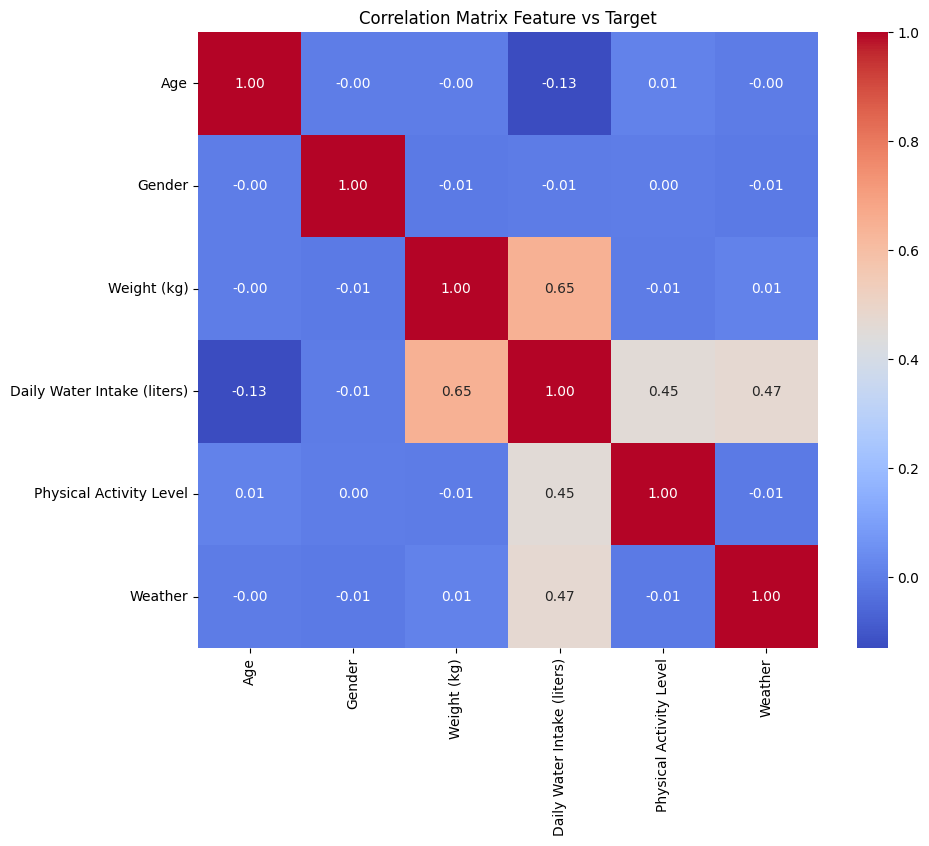

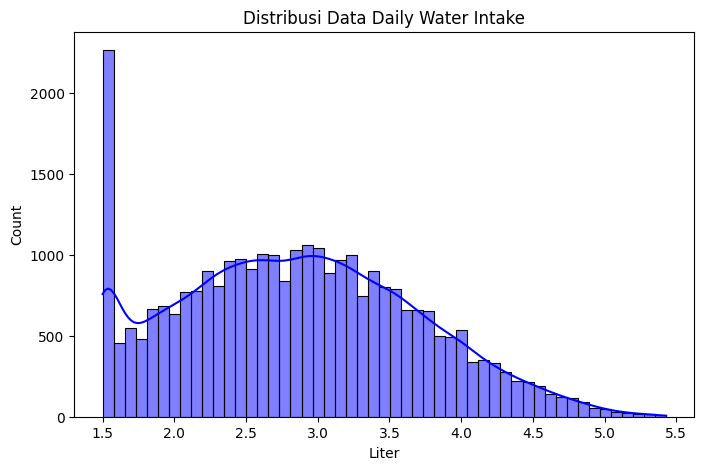

In [6]:
# ==========================================
# 3. EXPLORATORY DATA ANALYSIS (EDA)
# ==========================================
# Matriks Korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(df.drop('Hydration Level', axis=1).corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Feature vs Target')
plt.show()

# Distribusi Target
plt.figure(figsize=(8, 5))
sns.histplot(y, kde=True, color='blue')
plt.title('Distribusi Data Daily Water Intake')
plt.xlabel('Liter')
plt.show()

In [7]:
# ==========================================
# 4. MODELING (Random Forest Regressor)
# ==========================================
# Split Data 80% Training, 20% Testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling (Optional untuk Tree-based, tapi baik untuk standar pipeline)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Inisialisasi Model Regresi
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Training Model
model.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)


--- Evaluasi Model ---
RMSE (Root Mean Squared Error): 0.3181
MAE (Mean Absolute Error): 0.2632
R2 Score (Akurasi Regresi): 0.8525


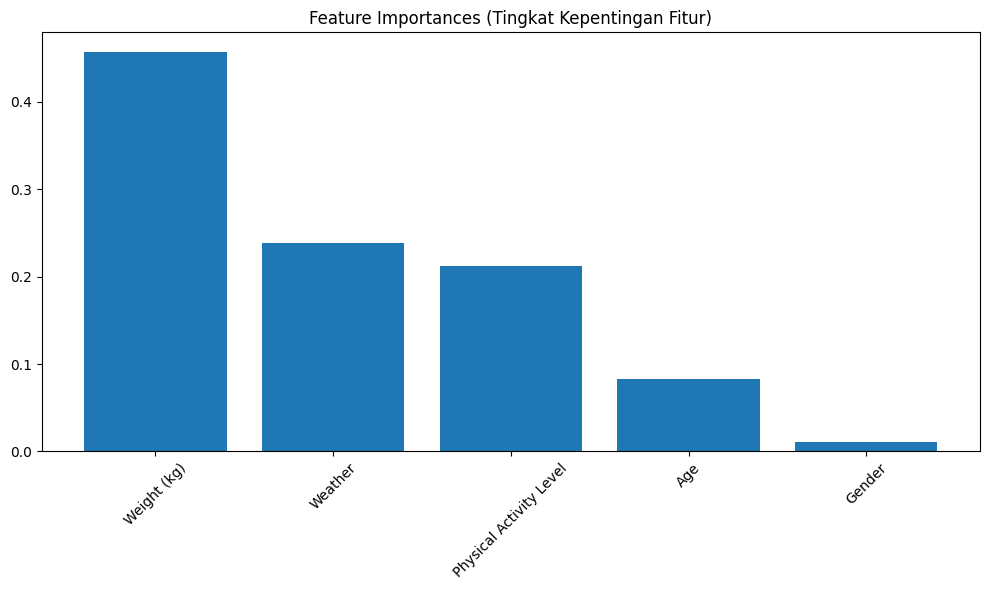

In [8]:
# ==========================================
# 5. EVALUASI MODEL
# ==========================================
y_pred = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\n--- Evaluasi Model ---")
print(f"RMSE (Root Mean Squared Error): {rmse:.4f}")
print(f"MAE (Mean Absolute Error): {mae:.4f}")
print(f"R2 Score (Akurasi Regresi): {r2:.4f}")

# Feature Importance (Analisa Faktor Terpenting)
importances = model.feature_importances_
feature_names = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importances (Tingkat Kepentingan Fitur)")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=45)
plt.tight_layout()
plt.show()


In [11]:
import os

# Define the directory name where the model will be saved
model_dir = 'trained_model'

# Create the directory if it doesn't exist
if not os.path.exists(model_dir):
    os.makedirs(model_dir)
    print(f"Directory '{model_dir}' created.")

# Define the full path for saving the model
model_path = os.path.join(model_dir, 'water_intake_predictor_model.pkl')

# Save the model to the specified path
joblib.dump(model, model_path)
print(f"\nModel successfully saved to '{model_path}'")


Model successfully saved to 'trained_model/water_intake_predictor_model.pkl'


In [20]:
# ==========================================
# 6. SAVE MODEL
# ==========================================
joblib.dump(model, 'water_intake_predictor_model.pkl')
print("\nModel berhasil disimpan sebagai 'water_intake_predictor_model.pkl'")


Model berhasil disimpan sebagai 'water_intake_predictor_model.pkl'


In [ ]:
# ==========================================
# SIMULASI PREDIKSI (DEMO)
# ==========================================
def predict_water_needs():
    print("--- SIMULASI PREDIKSI KEBUTUHAN AIR ---")
    print("Masukkan data diri Anda:")

    # Input User
    try:
        age = int(input("Usia (tahun): "))
        weight = float(input("Berat Badan (kg): "))

        print("\nPilih Gender: 0 = Male, 1 = Female")
        gender = int(input("Gender (0/1): "))

        print("\nPilih Aktivitas: 0 = Low, 1 = Moderate, 2 = High")
        activity = int(input("Aktivitas Fisik (0-2): "))

        print("\nPilih Cuaca: 0 = Cold, 1 = Normal, 2 = Hot")
        weather = int(input("Kondisi Cuaca (0-2): "))

        # Buat DataFrame untuk prediksi
        input_data = pd.DataFrame([[age, gender, weight, activity, weather]],
                                  columns=['Age', 'Gender', 'Weight (kg)', 'Physical Activity Level', 'Weather'])

        # Scale data (karena kita pakai scaler saat training)
        input_scaled = scaler.transform(input_data)

        # Prediksi
        prediction = model.predict(input_scaled)[0]

        print(f"\n===========================================")
        print(f"Hasil Prediksi Model:")
        print(f"Anda disarankan minum air sebanyak: {prediction:.2f} Liter/hari")
        print(f"===========================================")

    except ValueError:
        print("Input salah! Harap masukkan angka yang valid.")

# Jalankan Fungsi
predict_water_needs()

--- SIMULASI PREDIKSI KEBUTUHAN AIR ---
Masukkan data diri Anda:
Usia (tahun): 24
Berat Badan (kg): 56

Pilih Gender: 0 = Male, 1 = Female
Gender (0/1): 1

Pilih Aktivitas: 0 = Low, 1 = Moderate, 2 = High
Aktivitas Fisik (0-2): 1

Pilih Cuaca: 0 = Cold, 1 = Normal, 2 = Hot
Kondisi Cuaca (0-2): 1

Hasil Prediksi Model:
Anda disarankan minum air sebanyak: 1.99 Liter/hari
